In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# learning algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# required metrics for evaluating the algorithm performance on the test data
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score,roc_auc_score
# import pickle for saving model
import pickle

##**Explorations des données**


 Lire les données et les convertir en DataFrame


In [126]:
breast_cancer_df= load_breast_cancer()
df= pd.DataFrame(breast_cancer_df.data,columns=breast_cancer_df.feature_names)
df['diagnosis']= breast_cancer_df.target

Afficher les premières lignes du DataFrame

In [127]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


 Afficher des informations sur les types de données et les valeurs manquantes

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Afficher des statistiques descriptives du DataFrame

In [129]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Vérifier la forme du DataFrame (nombre de lignes, nombre de colonnes)

In [130]:
df.shape

(569, 31)

Vérifier les valeurs manquantes dans le DataFrame

In [131]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

Vérifier les valeurs en double dans le DataFrame

In [132]:
df.duplicated().sum()

0

## **VISUALISATION DES DONNEES**

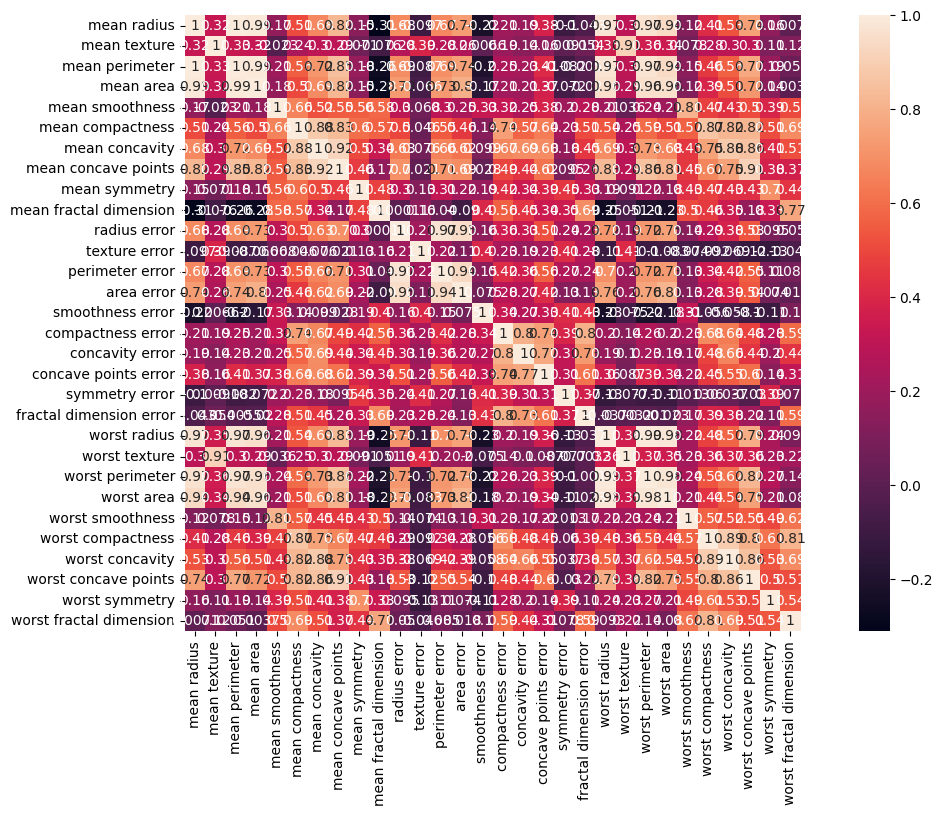

In [133]:
df_drop = df.drop('diagnosis',axis=1)
plt.figure(figsize=(15,8))
heat = sns.heatmap(df_drop.corr(), vmax=1, square=True, annot=True)

## **PRETRAITEMENT**



1.   Supprimer la colonne « diagnostic » du dataframeo d'origine et créer la variable cible notée y et lui attribuer les valeurs du « diagnostic » pour préparer les données pour la formation et la prédiction du modèle.

2.   Standardisation des valeurs des données dans un format commun, les données transformées auront une valeur moyenne de 0 et un écart type de 1.



In [134]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
# Data standardization
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

### Spliting data

*   les données sont divisées en ensemble d'entraînement et ensemble de test.
*   80 % des données constituent l'ensemble de formation tandis que 20 % constituent l'ensemble de test.



In [135]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size = 0.2, random_state = 42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

## **MODELISATION**

Création d'une fonction qui renvoie une data frame de l'accuracy, de la précision, du rappel et du score f1 et la matrice de confusion pour différents modèles de classification tels que Linear SVC, Logistic Regression, RandomForestClassifier, KNeighborsClassifier étant donné l'entrée x_train, x_test, y_train, y_test

In [136]:
def evaluate_model(x_train, x_test, y_train, y_test):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.svm import LinearSVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
    from sklearn.metrics import roc_auc_score

    model_dict = {
        'XGB': XGBClassifier(),
        'LR': LogisticRegression(),
        'RF': RandomForestClassifier(random_state=72),
        'SVC': SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5, probability=True),
        'KNN': KNeighborsClassifier(n_neighbors=2)
    }

    evaluate_dict = {}

    for name, model in model_dict.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        evaluate = [
            round((accuracy_score(y_test, y_pred) * 100), 2),
            round((precision_score(y_test, y_pred) * 100), 2),
            round(recall_score(y_test, y_pred) * 100, 2),
            round((f1_score(y_test, y_pred) * 100), 2),
            round(roc_auc_score(y_test, y_pred) * 100, 2)
        ]

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Visualize confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

        evaluate_dict[name] = evaluate

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
    evaluate_df = pd.DataFrame(evaluate_dict, index=metrics)

    return evaluate_df

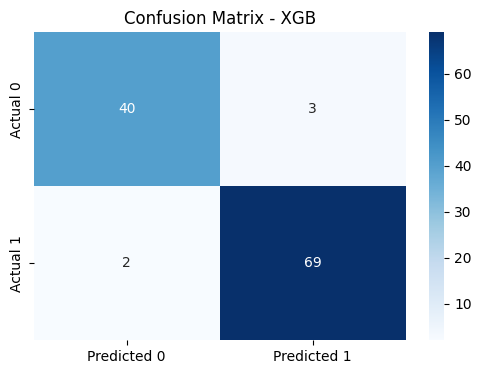

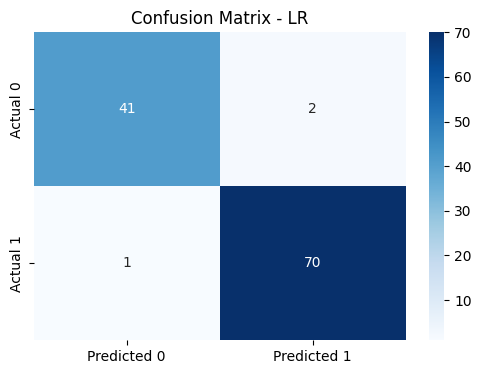

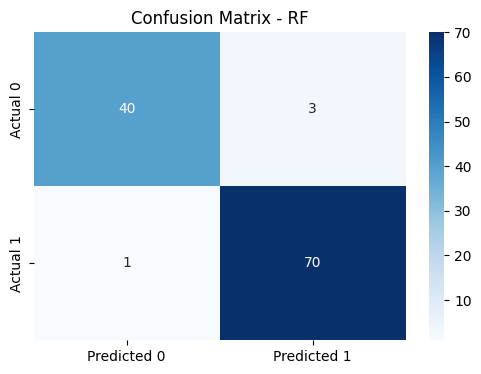

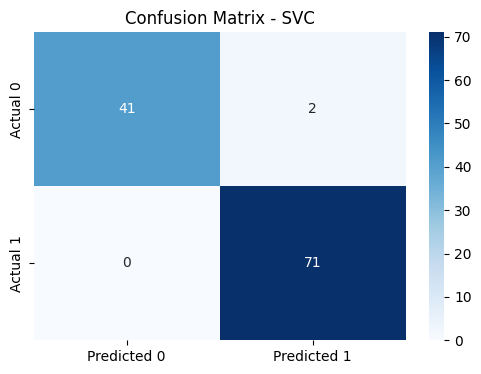

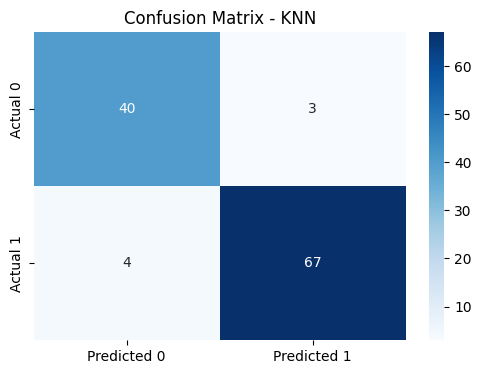

,XGB,LR,RF,SVC,KNN
Accuracy,95.61,97.37,96.49,98.25,93.86
Precision,95.83,97.22,95.89,97.26,95.71
Recall,97.18,98.59,98.59,100.00,94.37
F1-score,96.50,97.90,97.22,98.61,95.04
AUC,95.10,96.97,95.81,97.67,93.69


In [137]:
result_df = evaluate_model(x_train, x_test, y_train, y_test)
result_df

## **VALIDATION CROISEE**

In [138]:
def evaluate_model(x_train, x_test, y_train, y_test):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.svm import LinearSVC, SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
    from sklearn.metrics import roc_auc_score

    model_dict = {
        'XGB': XGBClassifier(),
        'LR': LogisticRegression(),
        'RF': RandomForestClassifier(random_state=72),
        'SVC': SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5, probability=True),
        'KNN': KNeighborsClassifier(n_neighbors=2)
    }

    evaluate_dict = {}

    for name, model in model_dict.items():
        # Cross-validation scores
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

        # Train the model on the full training set
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        evaluate = [
            round(np.mean(cv_scores) * 100, 2),  # Mean cross-validation accuracy
            round((accuracy_score(y_test, y_pred) * 100), 2),
            round((precision_score(y_test, y_pred) * 100), 2),
            round(recall_score(y_test, y_pred) * 100, 2),
            round((f1_score(y_test, y_pred) * 100), 2),
            round(roc_auc_score(y_test, y_pred) * 100, 2)
        ]

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Visualize confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

        evaluate_dict[name] = evaluate

    metrics = ['CV Accuracy', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
    evaluate_df = pd.DataFrame(evaluate_dict, index=metrics)

    return evaluate_df

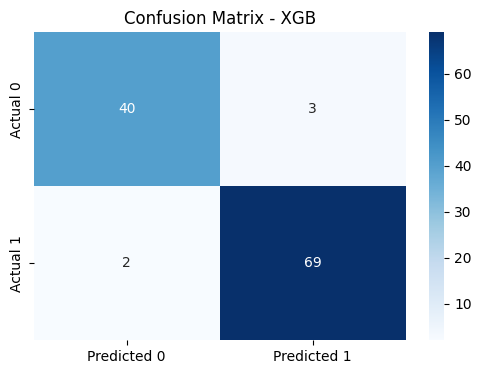

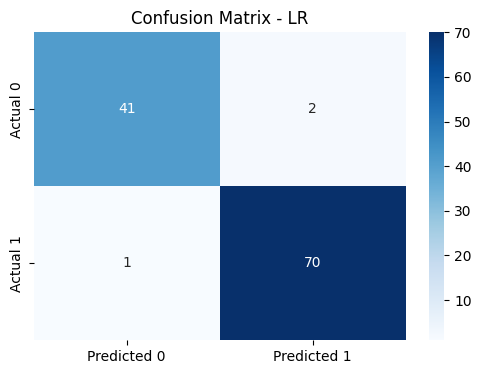

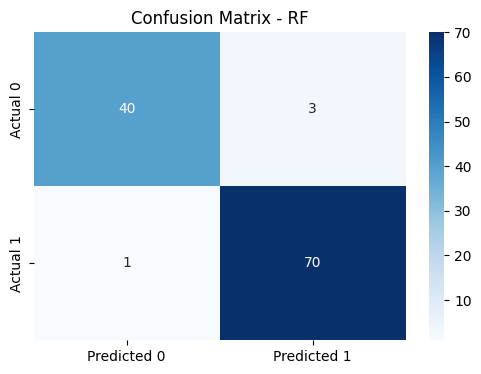

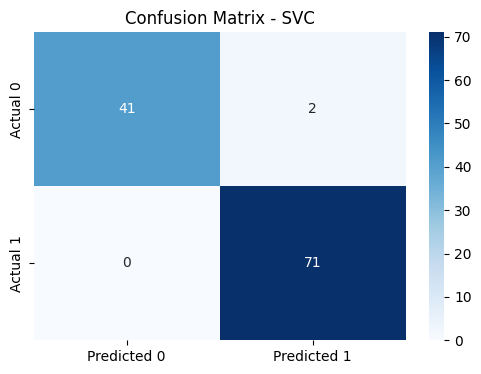

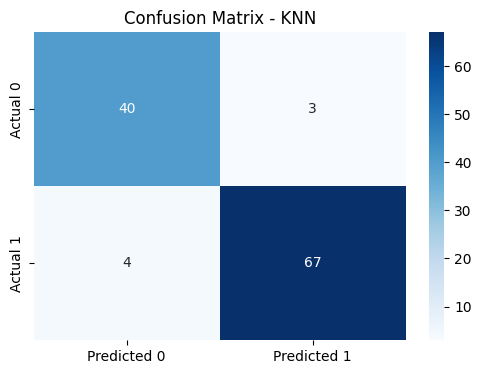

,XGB,LR,RF,SVC,KNN
CV Accuracy,96.26,97.58,95.82,97.36,94.73
Accuracy,95.61,97.37,96.49,98.25,93.86
Precision,95.83,97.22,95.89,97.26,95.71
Recall,97.18,98.59,98.59,100.00,94.37
F1-score,96.50,97.90,97.22,98.61,95.04
AUC,95.10,96.97,95.81,97.67,93.69


In [139]:
# Example usage:
result_df_valid = evaluate_model(x_train, x_test, y_train, y_test)
result_df_valid

## **TESTE SUR UN ECHANTILLON**

In [ ]:
# Créer une copie du DataFrame pour éviter de modifier l'original
df_copy = df.copy()
df_copy.head()

In [141]:
# Sélectionner un échantillon aléatoire de 10 lignes
random_sample = df_copy.sample(n=10, random_state=42)
# Séparer les caractéristiques (X) et la variable cible (y)
X_sample = random_sample.drop("diagnosis", axis=1)
y_sample = random_sample["diagnosis"]

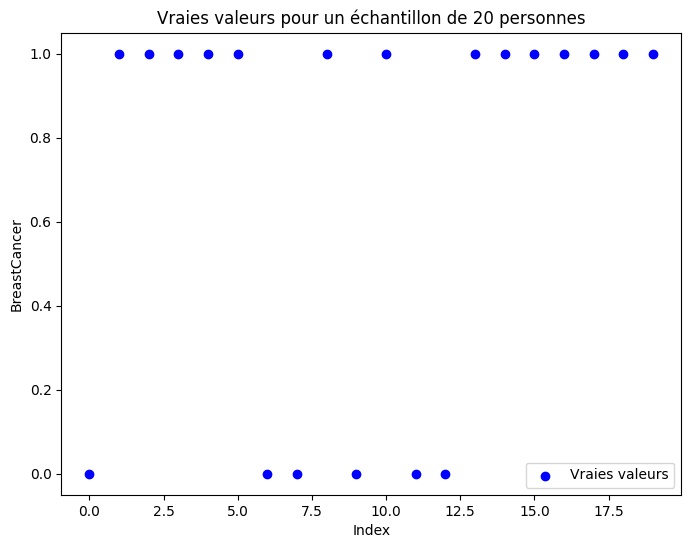

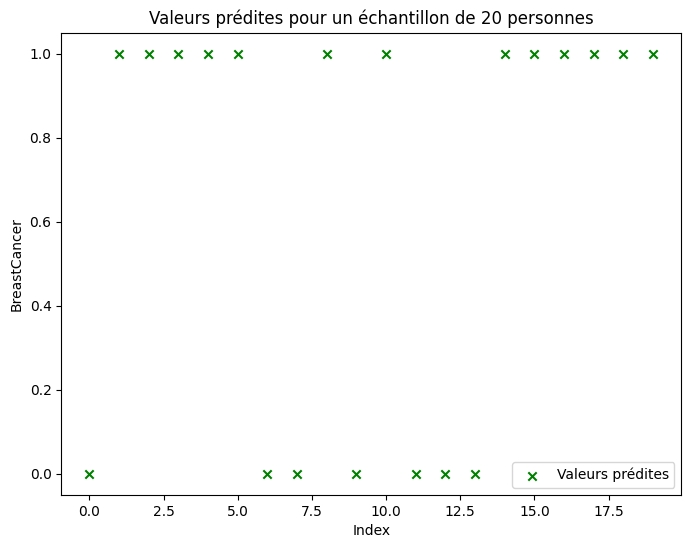

In [142]:
# Créer le classifieur CatBoost
LR = LogisticRegression()
# Adapter le modèle à l'ensemble de données d'entraînement
LR.fit(x_train, y_train)
# Prédictions sur l'ensemble de test
y_pred_all = LR.predict(x_test)
# Ajouter les colonnes des prédictions au DataFrame de l'ensemble de test
x_test= pd.DataFrame(x_test,columns=breast_cancer_df.feature_names)
y_test = pd.DataFrame(list(y_test), columns=['Real'])
df_test_predictions = x_test.copy()
df_test_predictions['Real'] = y_test
df_test_predictions['Predictions_LR'] = y_pred_all
# Sélectionner un échantillon aléatoire de 300 lignes dans l'ensemble de test
random_subset = df_test_predictions.sample(n=20, random_state=42)
# Plot pour les vraies valeurs
plt.figure(figsize=(8, 6))
plt.scatter(range(len(random_subset)), random_subset['Real'], label='Vraies valeurs', marker='o', color='blue')
plt.title('Vraies valeurs pour un échantillon de 20 personnes')
plt.xlabel('Index')
plt.ylabel('BreastCancer')
plt.legend()
plt.show()
# Plot pour les valeurs prédites
plt.figure(figsize=(8, 6))
plt.scatter(range(len(random_subset)), random_subset['Predictions_LR'], label='Valeurs prédites', marker='x', color='green')
plt.title('Valeurs prédites pour un échantillon de 20 personnes')
plt.xlabel('Index')
plt.ylabel('BreastCancer')
plt.legend()
plt.show()